# Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [61]:
advertising= pd.read_csv('Advertising.csv')
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Dropping

In [62]:
new_advertising= advertising.drop(columns=['Unnamed: 0'])
new_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# info

In [63]:
new_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Describe

In [64]:
new_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Shape

In [65]:
new_advertising.shape

(200, 4)

# Columns

In [66]:
new_advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# nunique

In [67]:

uniquee=new_advertising.nunique()
uniquee

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

Text(0.5, 1.0, 'Unique Advertising')

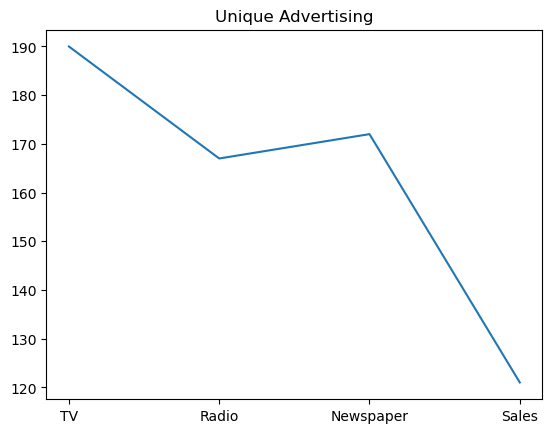

In [68]:
sns.lineplot(uniquee)
plt.title('Unique Advertising')

# isnull()

In [69]:
new_advertising.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


# Total advertising count of TV 

In [70]:
new_advertising['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

# Corr

In [71]:
new_advertisingcorr=new_advertising.corr()
new_advertisingcorr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Data Visualization

<Axes: >

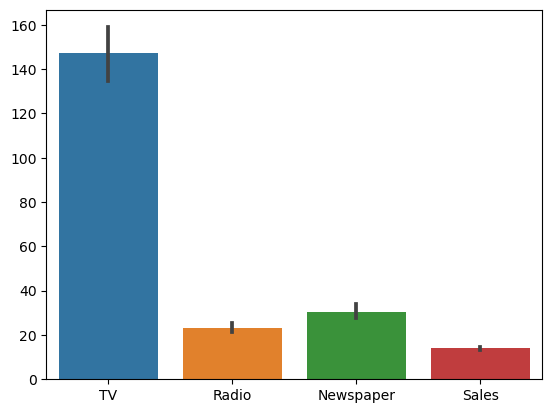

In [72]:
sns.barplot(new_advertising)

# pairplot

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


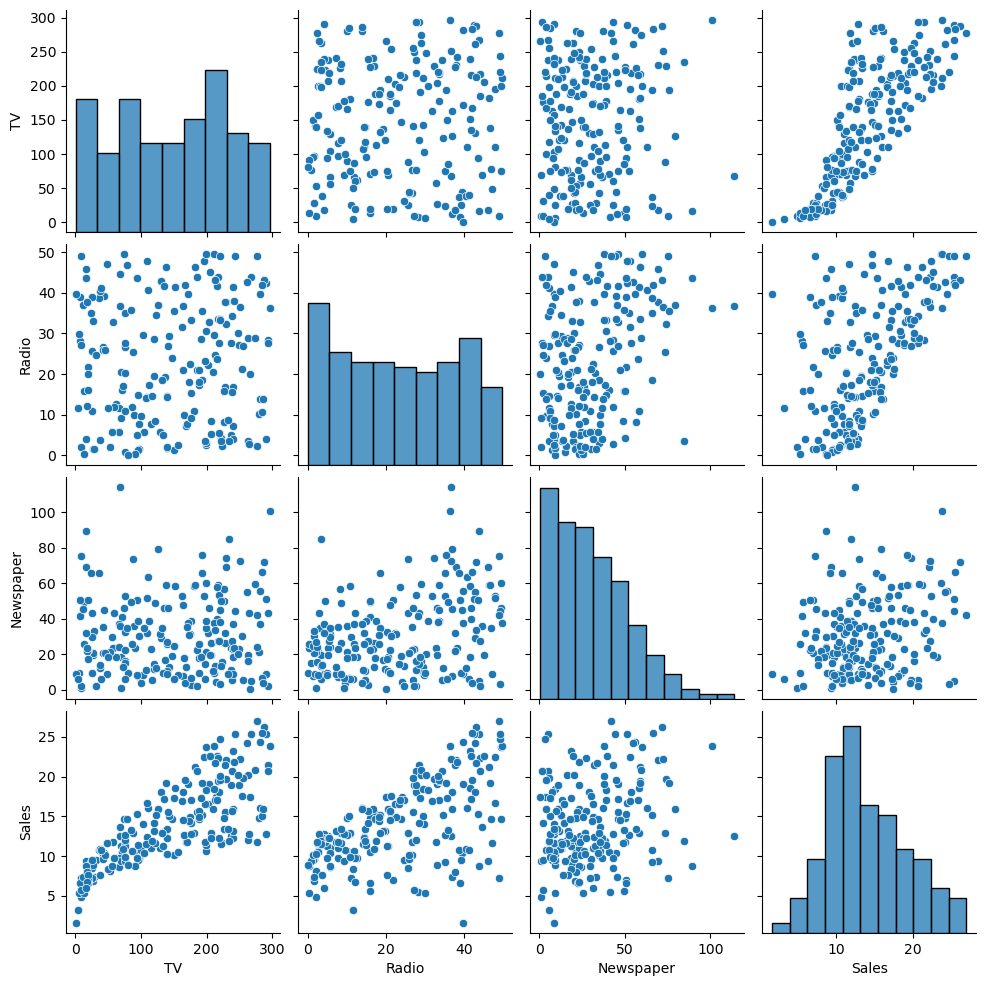

In [73]:
sns.pairplot(new_advertising)
plt.show()

# Scatter Plot for TV vs. Sales

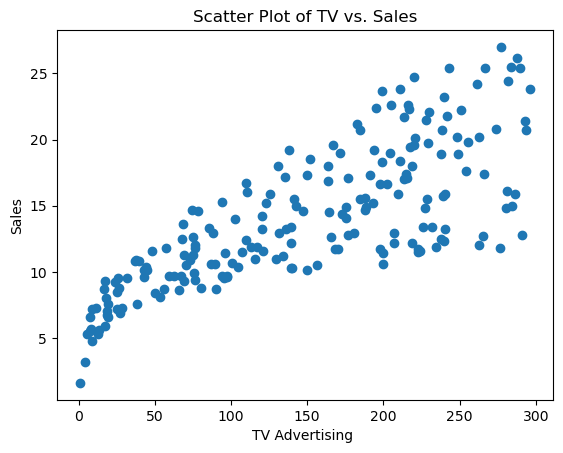

In [97]:
plt.scatter(new_advertising['TV'], new_advertising['Sales'])
plt.xlabel('TV Advertising ')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV vs. Sales')
plt.show()

# Scatter Plot for Radio vs. Sales

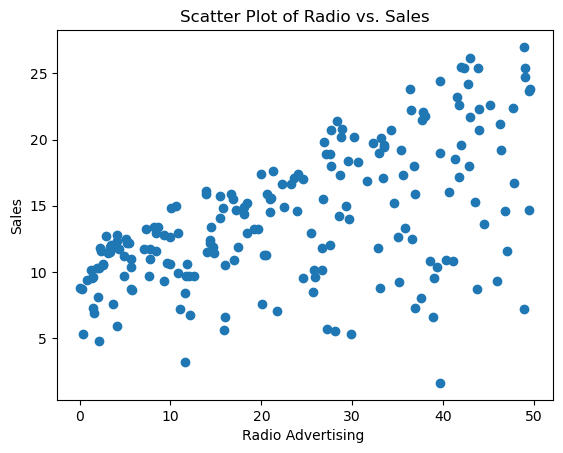

In [75]:
plt.scatter(new_advertising['Radio'], new_advertising['Sales'])
plt.xlabel('Radio Advertising ')
plt.ylabel('Sales')
plt.title('Scatter Plot of Radio vs. Sales')
plt.show()

# Scatter Plot of Newspaper vs. Sales

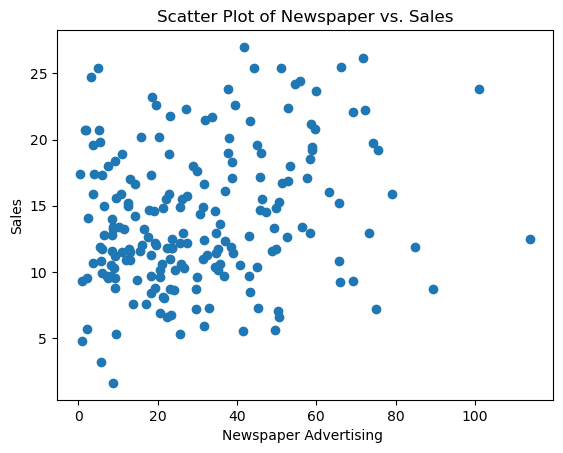

In [90]:
plt.scatter(new_advertising['Newspaper'], new_advertising['Sales'])
plt.xlabel('Newspaper Advertising ')
plt.ylabel('Sales')
plt.title('Scatter Plot of Newspaper vs. Sales')
plt.show()

# # Create a line plot showing the average number of Sales by TV

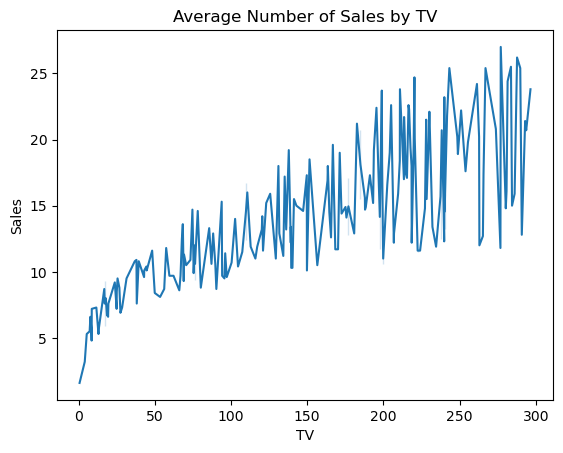

In [77]:
sns.lineplot(data=new_advertising, x="TV", y="Sales")
plt.title("Average Number of Sales by TV")
plt.show()

# Slicing Data


In [78]:
x=new_advertising[['TV', 'Radio', 'Newspaper']]
y=new_advertising['Sales']

# Split the data into training and testing sets

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Create and train a linear regression model

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Coefficients

In [81]:
coefficients = model.coef_
coefficients

array([ 0.04458402,  0.19649703, -0.00278146])

# Scatterplot with Regression Line

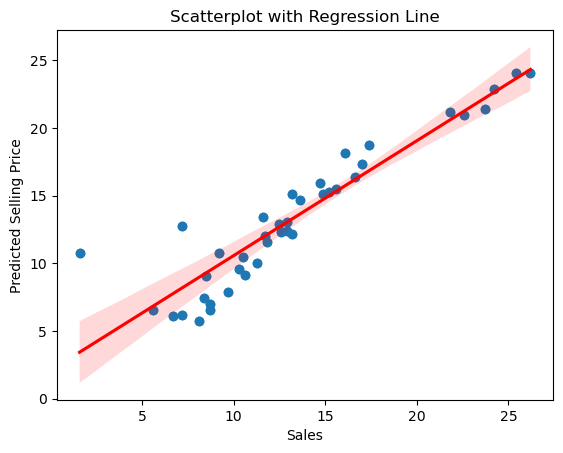

In [82]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title('Scatterplot with Regression Line')
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.show()


# Make predictions on the test set

In [83]:

model.predict([[230.1,37.8,69.2]])

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.48878664])

In [98]:
coefficients = model.coef_
coefficients

array([ 0.04458402,  0.19649703, -0.00278146])

# Top 5 Features with Largest Coefficients

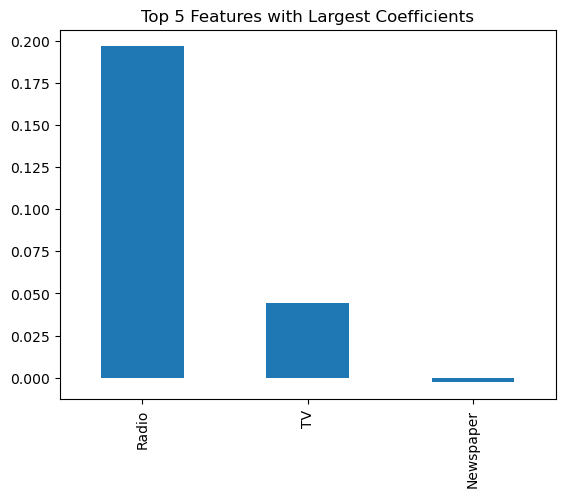

In [103]:

coeff = pd.Series( model.coef_, index=x.columns)
coeff.nlargest(5).plot(kind='bar')
plt.title('Top 5 Features with Largest Coefficients')
plt.show()

# Calculate the Mean Squared Error to evaluate the Linear Regression performance

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.402118291449685


# Calculate the Mean Absolute Error to evaluate the Linear Regression performance

In [85]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.3617813502090275


# Calculate the R-squared (R2) Score to evaluate the Linear Regression performance

In [86]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2*100}')

R-squared (R2) Score: 86.01145185017867


# Create a bar plot for MSE vs. MAE vs. R2

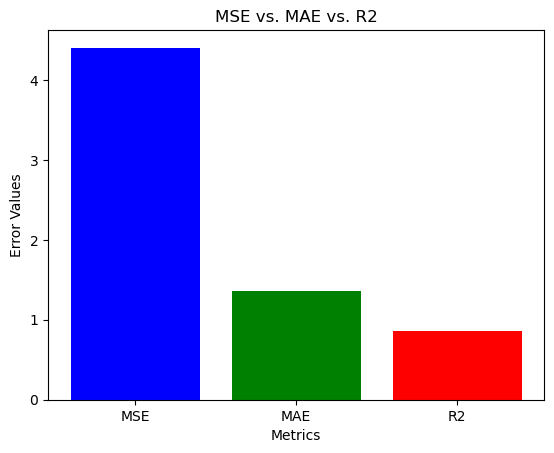

In [87]:
metrics = ['MSE', 'MAE','R2']
values = [mse, mae,r2]

plt.bar(metrics, values, color=['blue', 'green','red'])
plt.xlabel('Metrics')
plt.ylabel('Error Values')
plt.title('MSE vs. MAE vs. R2')
plt.show()